<a href="https://colab.research.google.com/github/kishtwal-Harshit/file_management_system/blob/main/emotionBasedMusicRecommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from PIL import Image
from tqdm import tqdm
import os

# convert string to integer
def atoi(s):
    n = 0
    for i in s:
        n = n*10 + ord(i) - ord("0")
    return n

# making folders
outer_names = ['test','train', 'val']
# original = ['angry', 'disgusted', 'fearful', 'happy', 'sad', 'surprised', 'neutral']
inner_names = ['angry', 'sad', 'fear', 'happy']
os.makedirs('data', exist_ok=True)
for outer_name in outer_names:
    os.makedirs(os.path.join('data',outer_name), exist_ok=True)
    for inner_name in inner_names:
        os.makedirs(os.path.join('data',outer_name,inner_name), exist_ok=True)

# to keep count of each category
angry = 0
happy = 0
sad = 0
fear = 0
angry_val = 0
happy_val = 0
sad_val = 0
fear_val = 0
angry_test = 0
happy_test = 0
sad_test = 0
fear_test = 0

df = pd.read_csv('/content/fer2013.csv')
print(df.head())
print(df.shape)
print(df.shape)
mat = np.zeros((48,48),dtype=np.uint8)
print(df['emotion'].value_counts())

   emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training
(35887, 3)
(35887, 3)
emotion
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: count, dtype: int64


In [ ]:
from tqdm import tqdm
from PIL import Image
import numpy as np

# Initialize counters for emotions
angry, sad, fear, happy = 0, 0, 0, 0
angry_val, sad_val, fear_val, happy_val = 0, 0, 0, 0
angry_test, sad_test, fear_test, happy_test = 0, 0, 0, 0

# Total images in the dataset
total_images = len(df)

# Define the split points for train, validation, and test sets
train_end = int(0.7 * total_images)  # 70% for training
val_end = int(0.85 * total_images)   # 15% for validation, 15% for test

# Iterate over the dataframe
for i in tqdm(range(total_images)):
    # Get the pixel data for the image
    txt = df['pixels'][i]
    words = txt.split()

    # Initialize a 48x48 matrix for the image
    mat = np.zeros((48, 48), dtype=np.uint8)

    # Fill the matrix with pixel values
    for j in range(2304):
        xind = j // 48
        yind = j % 48
        mat[xind][yind] = min(220, max(0, int(words[j])))

    # Convert the matrix to an image
    img = Image.fromarray(mat)

    # Split the data into train, validation, and test sets
    if i < train_end:  # Train set
        if df['emotion'][i] == 0:  # Angry
            img.save('/content/data/train/angry/im'+str(angry)+'.png')
            angry += 1
        elif df['emotion'][i] == 4:  # Sad
            img.save('/content/data/train/sad/im'+str(sad)+'.png')
            sad += 1
        elif df['emotion'][i] == 2:  # Fear
            img.save('/content/data/train/fear/im'+str(fear)+'.png')
            fear += 1
        elif df['emotion'][i] == 3:  # Happy
            img.save('/content/data/train/happy/im'+str(happy)+'.png')
            happy += 1

    elif train_end <= i < val_end:  # Validation set
        if df['emotion'][i] == 0:  # Angry
            img.save('/content/data/val/angry/im'+str(angry_val)+'.png')
            angry_val += 1
        elif df['emotion'][i] == 4:  # Sad
            img.save('/content/data/val/sad/im'+str(sad_val)+'.png')
            sad_val += 1
        elif df['emotion'][i] == 2:  # Fear
            img.save('/content/data/val/fear/im'+str(fear_val)+'.png')
            fear_val += 1
        elif df['emotion'][i] == 3:  # Happy
            img.save('/content/data/val/happy/im'+str(happy_val)+'.png')
            happy_val += 1

    else:  # Test set
        if df['emotion'][i] == 0:  # Angry
            img.save('/content/data/test/angry/im'+str(angry_test)+'.png')
            angry_test += 1
        elif df['emotion'][i] == 4:  # Sad
            img.save('/content/data/test/sad/im'+str(sad_test)+'.png')
            sad_test += 1
        elif df['emotion'][i] == 2:  # Fear
            img.save('/content/data/test/fear/im'+str(fear_test)+'.png')
            fear_test += 1
        elif df['emotion'][i] == 3:  # Happy
            img.save('/content/data/test/happy/im'+str(happy_test)+'.png')
            happy_test += 1

print("Done!")


100%|██████████| 35887/35887 [02:16<00:00, 262.28it/s]

Done!


emotion
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: count, dtype: int64


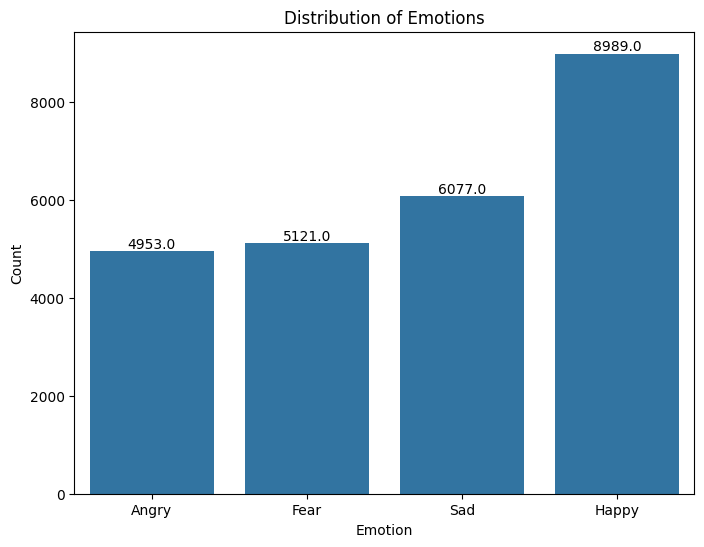

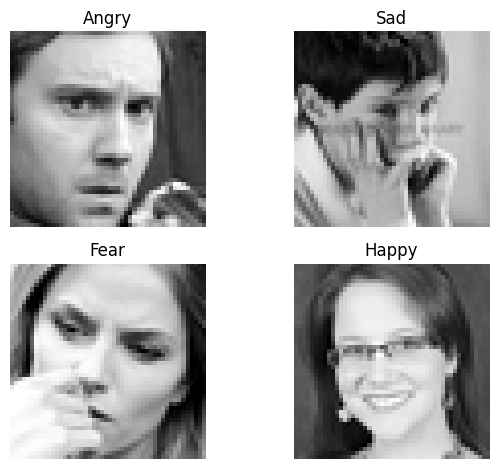

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
print(df['emotion'].value_counts())
# Mapping numeric labels to emotion labels
emotion_mapping = {0: 'Angry', 4: 'Sad', 2: 'Fear', 3: 'Happy'}
df['emotion_label'] = df['emotion'].map(emotion_mapping)

# Distribution of Emotions
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='emotion_label', data=df)
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

# Sample Images for each Emotion
emotion_indices = [0, 4, 2, 3]
for idx, i in enumerate(emotion_indices):
    plt.subplot(2, 2, idx + 1)  # Use sequential index instead of i + 1
    sample_image = df[df['emotion'] == i]['pixels'].iloc[0].split()
    sample_image = np.array(sample_image, dtype=np.uint8).reshape((48, 48))

    plt.imshow(sample_image, cmap='gray')
    plt.title(emotion_mapping[i])
    plt.axis('off')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


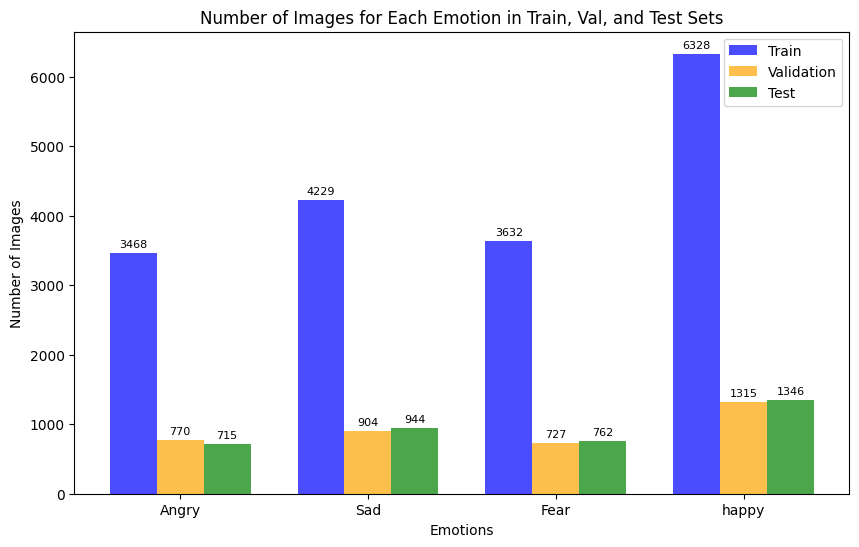

In [ ]:
import matplotlib.pyplot as plt

# Count the number of images for each emotion in train, val, and test sets
train_counts = [angry,sad,fear,happy]
val_counts = [angry_val,sad_val,fear_val,happy_val]
test_counts = [angry_test,sad_test,fear_test,happy_test]

emotions = ['Angry', 'Sad', 'Fear', 'happy']

# Plotting the bar graph
bar_width = 0.25
index = range(len(emotions))

plt.figure(figsize=(10, 6))
bars_train = plt.bar(index, train_counts, width=bar_width, label='Train', color='blue', alpha=0.7)
bars_val = plt.bar([i + bar_width for i in index], val_counts, width=bar_width, label='Validation', color='orange', alpha=0.7)
bars_test = plt.bar([i + 2 * bar_width for i in index], test_counts, width=bar_width, label='Test', color='green', alpha=0.7)

plt.xlabel('Emotions')
plt.ylabel('Number of Images')
plt.title('Number of Images for Each Emotion in Train, Val, and Test Sets')
plt.xticks([i + bar_width for i in index], emotions)
plt.legend()

# Add labels on top of each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 50, round(yval), ha='center', va='bottom', fontsize=8)

add_labels(bars_train)
add_labels(bars_val)
add_labels(bars_test)

plt.show()

In [ ]:
import numpy as np
import argparse
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
def plot_model_history(model_history):

    'Plot Accuracy and Loss curves with the model_history'

    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1,len(model_history.history['accuracy'])/10))
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1,len(model_history.history['loss'])/10))
    axs[1].legend(['train', 'val'], loc='best')
    fig.savefig('plot.png')
    plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directories for data
train_dir = '/content/data/train'
val_dir = '/content/data/val'
test_dir = '/content/data/test'

# Number of images in each set
num_train = 21005
num_val = 2622
batch_size = 64
num_epoch = 10

# Data generators with rescaling
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generators to load data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

# Create the model with 4 output classes (adjusted for 4 classes)
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Train the model
model_info = model.fit(
        train_generator,
        steps_per_epoch=num_train // batch_size,
        epochs=num_epoch,
        validation_data=validation_generator,
        validation_steps=num_val // batch_size)


Found 17657 images belonging to 4 classes.
Found 3716 images belonging to 4 classes.
Found 3767 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


276/328 ━━━━━━━━━━━━━━━━━━━━ 47s 915ms/step - accuracy: 0.3547 - loss: 1.3563

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


328/328 ━━━━━━━━━━━━━━━━━━━━ 266s 802ms/step - accuracy: 0.3580 - loss: 1.3533 - val_accuracy: 0.4102 - val_loss: 1.2668
Epoch 2/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 325s 812ms/step - accuracy: 0.4531 - loss: 1.2125 - val_accuracy: 0.5078 - val_loss: 1.0796
Epoch 3/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 311s 779ms/step - accuracy: 0.5267 - loss: 1.0729 - val_accuracy: 0.5613 - val_loss: 1.0138
Epoch 4/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 272s 809ms/step - accuracy: 0.5597 - loss: 1.0120 - val_accuracy: 0.6082 - val_loss: 0.9435
Epoch 5/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 319s 801ms/step - accuracy: 0.5918 - loss: 0.9514 - val_accuracy: 0.6066 - val_loss: 0.9440
Epoch 6/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 324s 806ms/step - accuracy: 0.6129 - loss: 0.9187 - val_accuracy: 0.6254 - val_loss: 0.8958
Epoch 7/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 317s 792ms/step - accuracy: 0.6273 - loss: 0.8813 - val_accuracy: 0.6336 - val_loss: 0.8678
Epoch 8/10
328/328 ━━━━━━━━━━━━━━━━━━━━ 269s 814ms/step - accuracy: 0.6419 - loss: 0.84

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])
eval_result = model.evaluate(test_generator, steps=len(test_generator))


# Print the evaluation result
print("Test Loss:", eval_result[0])
print("Test Accuracy:", eval_result[1])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


59/59 ━━━━━━━━━━━━━━━━━━━━ 19s 313ms/step - accuracy: 0.2419 - loss: 1.3852
Test Loss: 1.3851042985916138
Test Accuracy: 0.24581895768642426


In [ ]:
model.save_weights('model_weights_training.weights.h5')  # Corrected filename
model.save('model_new_training.h5')

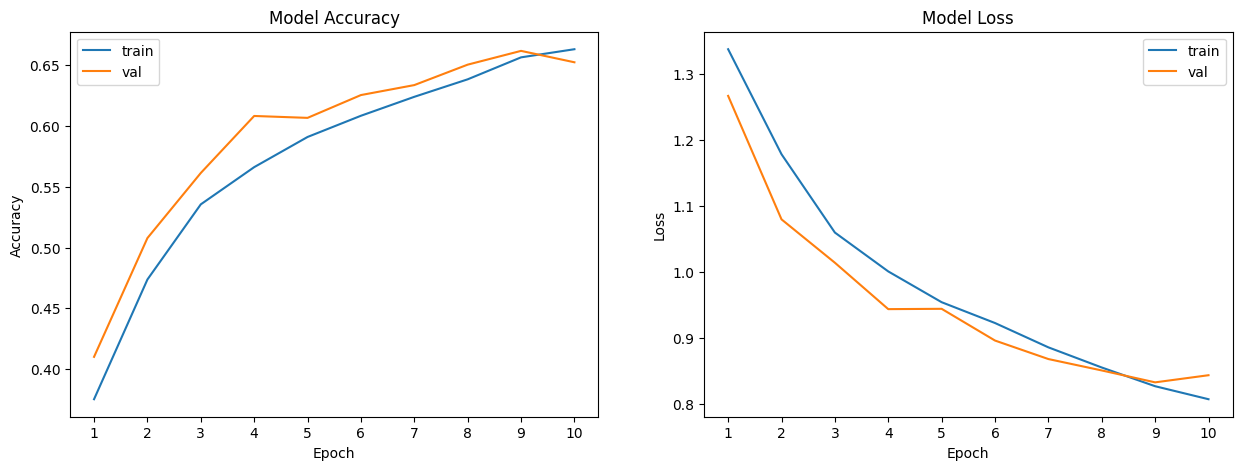

In [ ]:
plot_model_history(model_info)

In [ ]:
model_history_df = pd.DataFrame(model_info.history)
model_history_df

,accuracy,loss,val_accuracy,val_loss
0,0.375319,1.337517,0.410156,1.266763
1,0.473750,1.178307,0.507812,1.079561
2,0.535538,1.059572,0.561328,1.013816
3,0.566121,1.000633,0.608203,0.943468
4,0.590927,0.953977,0.606641,0.943951
5,0.608371,0.922408,0.625391,0.895833
6,0.623945,0.885523,0.633594,0.867790
7,0.638330,0.854981,0.650391,0.850511
8,0.656397,0.826603,0.661719,0.832456
9,0.663080,0.806885,0.652344,0.843277


In [ ]:
index_where_equal = (model_history_df['loss'] - model_history_df['val_loss']).abs().idxmin()
index_where_min = model_history_df['val_loss'].idxmin()
index_where_equal, index_where_min

(7, 8)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Directories for data
train_dir = '/content/data/train'
val_dir = '/content/data/val'
test_dir = '/content/data/test'

# Number of images in each set
num_train = 21005
num_val = 2622
batch_size = 64
num_epoch = 20

# Data generators with rescaling
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Generators to load data
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(48,48),
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

# Create the model with 4 output classes (adjusted for 4 classes)
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

# Train the model
model_info = model.fit(
        train_generator,
        steps_per_epoch=num_train // batch_size,
        epochs=num_epoch,
        validation_data=validation_generator,
        validation_steps=num_val // batch_size)


Found 17657 images belonging to 4 classes.
Found 3716 images belonging to 4 classes.
Found 3767 images belonging to 4 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
276/328 ━━━━━━━━━━━━━━━━━━━━ 48s 932ms/step - accuracy: 0.3663 - loss: 1.3577

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


328/328 ━━━━━━━━━━━━━━━━━━━━ 270s 814ms/step - accuracy: 0.3675 - loss: 1.3553 - val_accuracy: 0.4387 - val_loss: 1.2669
Epoch 2/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 261s 793ms/step - accuracy: 0.4578 - loss: 1.2147 - val_accuracy: 0.5336 - val_loss: 1.0646
Epoch 3/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 262s 794ms/step - accuracy: 0.5364 - loss: 1.0628 - val_accuracy: 0.5816 - val_loss: 0.9726
Epoch 4/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 263s 798ms/step - accuracy: 0.5797 - loss: 0.9666 - val_accuracy: 0.6078 - val_loss: 0.9186
Epoch 5/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 262s 796ms/step - accuracy: 0.6044 - loss: 0.9149 - val_accuracy: 0.6320 - val_loss: 0.8701
Epoch 6/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 322s 983ms/step - accuracy: 0.6304 - loss: 0.8737 - val_accuracy: 0.6465 - val_loss: 0.8612
Epoch 7/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 323s 802ms/step - accuracy: 0.6480 - loss: 0.8341 - val_accuracy: 0.6504 - val_loss: 0.8431
Epoch 8/20
328/328 ━━━━━━━━━━━━━━━━━━━━ 322s 802ms/step - accuracy: 0.6620 - loss: 0.80

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])
eval_result = model.evaluate(test_generator, steps=len(test_generator))


# Print the evaluation result
print("Test Loss:", eval_result[0])
print("Test Accuracy:", eval_result[1])

59/59 ━━━━━━━━━━━━━━━━━━━━ 16s 255ms/step - accuracy: 0.6631 - loss: 0.9077
Test Loss: 0.888035237789154
Test Accuracy: 0.6663126945495605


In [ ]:
model.save_weights('model_weights_training.weights.h5')  # Corrected filename
model.save('model_new_training.h5')

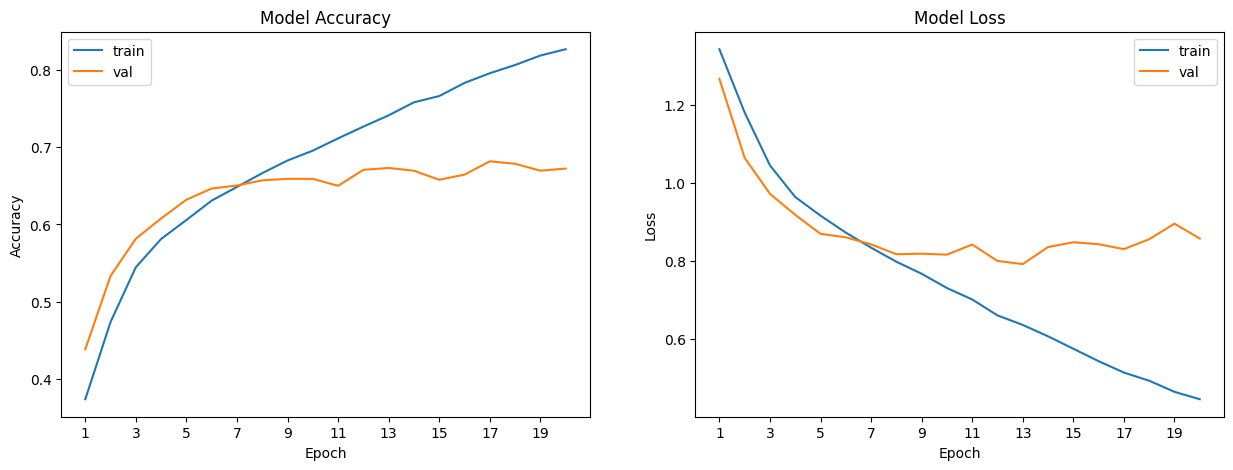

In [ ]:
plot_model_history(model_info)

59/59 ━━━━━━━━━━━━━━━━━━━━ 17s 274ms/step


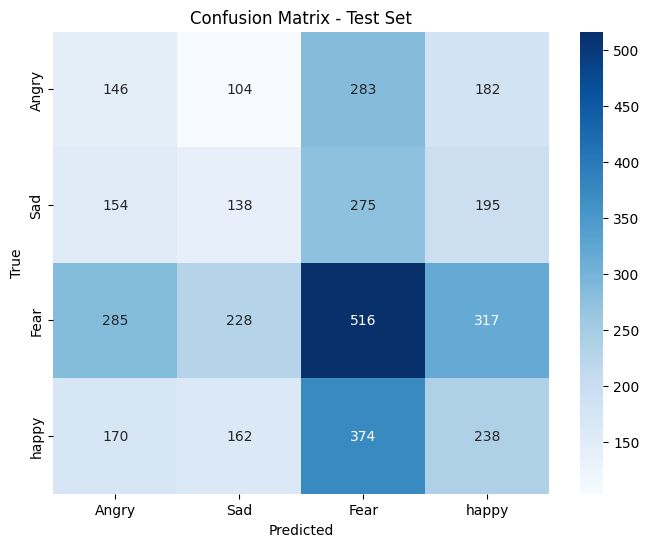


Classification Report:
               precision    recall  f1-score   support

       Angry       0.19      0.20      0.20       715
         Sad       0.22      0.18      0.20       762
        Fear       0.36      0.38      0.37      1346
       happy       0.26      0.25      0.25       944

    accuracy                           0.28      3767
   macro avg       0.26      0.26      0.25      3767
weighted avg       0.27      0.28      0.27      3767



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# ... (your existing code)

# Evaluate the model on the test dataset
y_true = test_generator.classes
y_pred = model.predict(test_generator, steps=len(test_generator)).argmax(axis=1)


# Create the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotions, yticklabels=emotions)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print classification report
print("\nClassification Report:\n", classification_report(y_true, y_pred, target_names=emotions))

In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow
import argparse
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# mode = "display"

# Create the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))


def emotion_recog(frame):
    model.load_weights('model_weights_training.weights.h5')

    # prevents openCL usage and unnecessary logging messages
    cv2.ocl.setUseOpenCL(False)

    # dictionary which assigns each label an emotion (alphabetical order)
    #Updated:
    class_to_label = {0: 0, 1: 3, 2: 2, 3: 4}

    # frame = cv2.imread("image1.jpg")
    # facecasc = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') # for jupyter
    facecasc = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml') # for colab
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 255), 3)
        roi_gray = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
        prediction = model.predict(cropped_img)

        maxindex = int(np.argmax(prediction))
        print(maxindex)

        # Map the predicted class to the original emotion label
        original_label = class_to_label[maxindex]

        # Get the emotion name using the original emotion mapping
        emotion = emotion_mapping.get(original_label, 'Unknown')
        print(emotion)

        cv2.putText(frame, emotion, (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    return frame


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
0
Angry


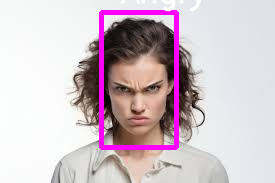

In [ ]:

input = cv2.imread("/content/img_f.jpeg")
output = emotion_recog(input)
cv2_imshow(output)